In [181]:
import pandas as pd
# Import linear regression model from sklearn
from sklearn.linear_model import LinearRegression
# Import random forest model from sklearn
from sklearn.ensemble import RandomForestRegressor
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split 
# Standard scaler
from sklearn.preprocessing import StandardScaler, Normalizer

# Load final data
df = pd.read_csv('data/jobs_step_1_final.csv')

x_cols = [
    'priority',
    'required-memory',
    'required-CPUs',
    'allocation_nodes',
    'steps-time-elapsed',
    
    'tres-allocated-cpu',
    'tres-allocated-mem',
    'tres-allocated-node',
    
    #'steps-tres-requested-total-mem',
    #'steps-tres-requested-total-vmem',
]

y_cols = [
    'steps-tres-consumed-total-energy',
    'steps-statistics-energy-consumed',
]

X, Y = df[x_cols], df[y_cols]

# Fit standard scaler to X
scaler = StandardScaler()
scaler.fit(df[x_cols])

normalizer = Normalizer()
normalizer.fit(X_train)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Reset index
X_train, X_test, y_train, y_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True), y_train.reset_index(drop=True), y_test.reset_index(drop=True)
X_train.shape

(5565, 8)

In [182]:
# # Create linear regression model
# model = LinearRegression()
# model.fit(scaler.transform(X_train), y_train[y_cols[0]])

# model1 = LinearRegression()
# model1.fit(scaler.transform(X_train), y_train[y_cols[1]])

# # Print test score
# print('Scores for linear regression model')
# print(f'Score for {y_cols[0]}: {model.score(scaler.transform(X_test), y_test[y_cols[0]])}')
# print(f'Score for {y_cols[1]}: {model1.score(scaler.transform(X_test), y_test[y_cols[1]])}')

In [183]:
(2.7778 * (10**-7))

2.7778e-07

In [184]:
# Create random forest model
hyperparams = {
    'n_estimators': 5,
    'max_depth': 10,
    'random_state': 42,
}

model = RandomForestRegressor(**hyperparams)
model1 = RandomForestRegressor(**hyperparams)

# Fit 
model = model.fit(X_train, y_train[y_cols[0]])
model1 = model1.fit(X_train, y_train[y_cols[1]])

# Print test score
print('Test scores for Random Forest Regression')
print('-' * 50)
print(f'R2 Score for {y_cols[0]}: {model.score(X_test, y_test[y_cols[0]]):.2f}')
print(f'R2 Score for {y_cols[1]}: {model1.score(X_test, y_test[y_cols[1]]):.2f}')

# Calculate the absolute errors
ab_total = abs(model.predict(X_test) - y_test[y_cols[0]])
ab_statistic = abs(model1.predict(X_test) - y_test[y_cols[1]])

# Calculate the mean squared error
mse_total = (ab_total**2).mean()
mse_statistic = (ab_statistic**2).mean()

# Print out the mean absolute error (mae)
print('-' * 50)
print(f'Mean Absolute Error for {y_cols[0]}: {ab_total.mean():.2f} kWh')
print(f'Mean Absolute Error for {y_cols[1]}: {ab_statistic.mean():.2f} joule or {ab_statistic.mean() * (2.7778 * (10**-7)):.2f} kWh')

# Keep in mind the standard deviation of the target variable
print('-' * 50)
print(f'Mean of {y_cols[0]}: {y_test[y_cols[0]].mean():.2f} kWh')
print(f'Standard deviation of {y_cols[0]}: {y_test[y_cols[0]].std():.2f} kWh')
print(f'Mean of {y_cols[1]}: {y_test[y_cols[1]].mean():.2f} joule or {y_test[y_cols[1]].mean() * (2.7778 * (10**-7)):.2f} kWh')
print(f'Standard deviation of {y_cols[1]}: {y_test[y_cols[1]].std():.2f} joule or {y_test[y_cols[1]].std() * (2.7778 * (10**-7)):.2f} kWh')

Test scores for Random Forest Regression
--------------------------------------------------
R2 Score for steps-tres-consumed-total-energy: 0.77
R2 Score for steps-statistics-energy-consumed: 0.83
--------------------------------------------------
Mean Absolute Error for steps-tres-consumed-total-energy: 19.61 kWh
Mean Absolute Error for steps-statistics-energy-consumed: 2618563.41 joule or 0.73 kWh
--------------------------------------------------
Mean of steps-tres-consumed-total-energy: 173.85 kWh
Standard deviation of steps-tres-consumed-total-energy: 80.68 kWh
Mean of steps-statistics-energy-consumed: 12581820.62 joule or 3.49 kWh
Standard deviation of steps-statistics-energy-consumed: 31009620.37 joule or 8.61 kWh


In [185]:
# Create a dataframe with the absolute errors
ab = pd.DataFrame({'Abs_err_for_total-energy': ab_total, 'Abs_err_for_statistics-energy': ab_statistic})

print(ab.shape)
# Add the absolute errors and X_Test to new dataframe
ab = pd.concat([ab, X_test], axis=1).reset_index(drop=True)
print(ab.shape)
ab.head(10)

(1392, 2)
(1392, 10)


,Abs_err_for_total-energy,Abs_err_for_statistics-energy,priority,required-memory,required-CPUs,allocation_nodes,steps-time-elapsed,tres-allocated-cpu,tres-allocated-mem,tres-allocated-node
0,4.579512,1.249560e+05,6.0,122880.0,28.0,1.0,1230.0,28.0,122880.0,1.0
1,11.519420,1.239977e+05,22.0,102400.0,28.0,1.0,3048.0,28.0,102400.0,1.0
2,12.686156,2.074289e+05,17.0,122880.0,28.0,1.0,2559.0,28.0,122880.0,1.0
3,11.383886,4.557471e+04,1434.0,2048.0,24.0,1.0,10870.0,24.0,49152.0,1.0
4,0.424435,1.974015e+04,17.0,122880.0,28.0,1.0,2979.0,28.0,122880.0,1.0
5,5.573254,4.965706e+05,687.0,102400.0,28.0,1.0,56889.0,28.0,102400.0,1.0
6,70.498333,8.372532e+05,20.0,102400.0,28.0,1.0,116210.0,24.0,122880.0,1.0
7,7.560861,2.608936e+03,108.0,102400.0,28.0,1.0,3138.0,28.0,102400.0,1.0
8,3.482819,4.926202e+06,3.0,122880.0,28.0,1.0,316808.0,28.0,122880.0,1.0
9,5.797252,1.307001e+03,108.0,102400.0,28.0,1.0,3154.0,28.0,102400.0,1.0


In [186]:
# Cluster the test data
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score

X_test_normalized = normalizer.transform(X_test)

# Create a KMeans model with 2 clusters: model
kmans = KMeans(n_clusters=3, random_state=42)
kmans.fit(X_test_normalized)

# Use the .predict() method to predict the labels of X: labels
labels = kmans.predict(X_test_normalized)

# Calculate the silhouette_score
silhouette_score(X_test_normalized, labels)

c:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7702052556476673

PCA explained variance: [0.76288771 0.20067932]. Sum: 0.963567031210852
(1392, 12)


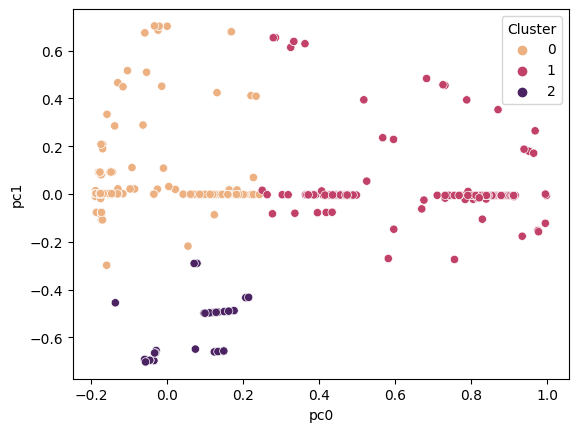

In [187]:
# Now we will try to visualize the clusters in 2D
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Create a PCA instance: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the samples
pca.fit(X_test_normalized)

# Transform the samples: pca_features
pca_features = pca.transform(X_test_normalized)

# Print how much of the variance is explained by the first two components
print(f'PCA explained variance: {pca.explained_variance_ratio_}. Sum: {sum(pca.explained_variance_ratio_)}')

# Create a DataFrame with the two columns: df
df = pd.DataFrame(pca_features, columns=['pc0', 'pc1']).reset_index(drop=True)
df = pd.concat([df, ab], axis=1)
print(df.shape)

# Create a scatter plot of the two columns
sns.scatterplot(x='pc0', y='pc1', data=df, hue=labels, palette='flare')
# Add label to legend
plt.legend(title='Cluster')

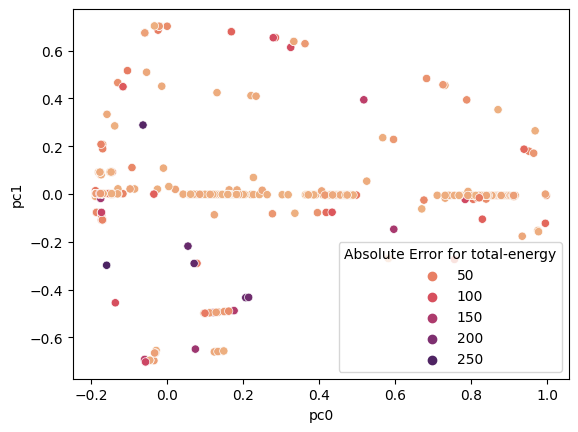

In [188]:
# Visualize test absolute errors on principal components

# Create a scatter plot of the two columns
sns.scatterplot(x='pc0', y='pc1', data=df, hue='Abs_err_for_total-energy', palette='flare')
# Add label to legend
plt.legend(title='Absolute Error for total-energy')

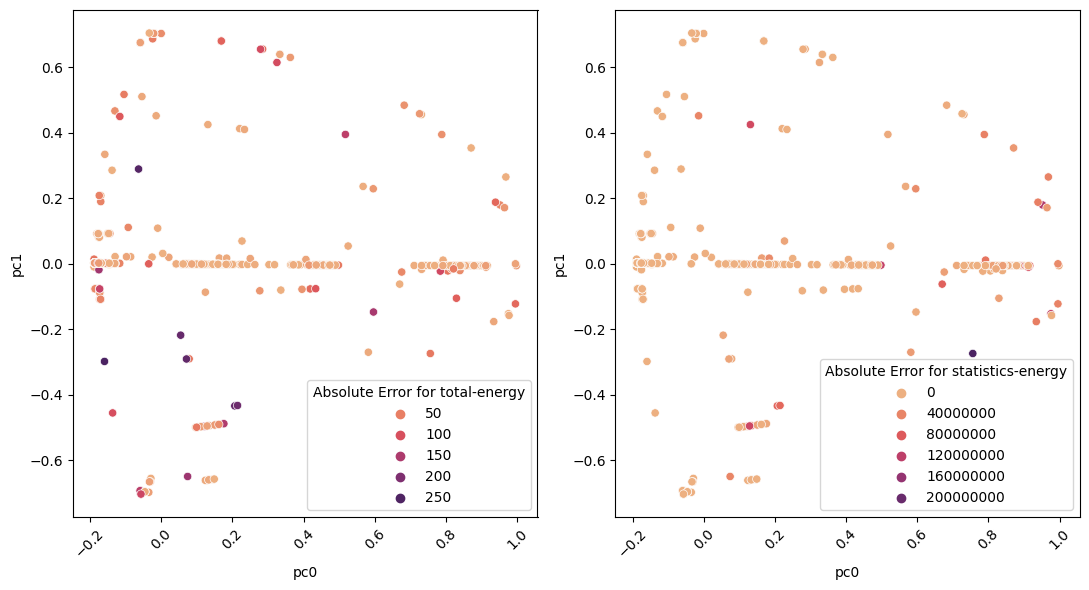

In [189]:
# Plot errors for both targets on the same plot dependent on the principal components
fig, ax = plt.subplots(1, 2, figsize=(11, 6))
sns.scatterplot(x='pc0', y='pc1', data=df, hue='Abs_err_for_total-energy', palette='flare', ax=ax[0])
sns.scatterplot(x='pc0', y='pc1', data=df, hue='Abs_err_for_statistics-energy', palette='flare', ax=ax[1])
# Add label to legend
ax[0].legend(title='Absolute Error for total-energy')
ax[1].legend(title='Absolute Error for statistics-energy')

# Rotate xticks for better readability
plt.setp(ax[0].get_xticklabels(), rotation=45)
plt.setp(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()

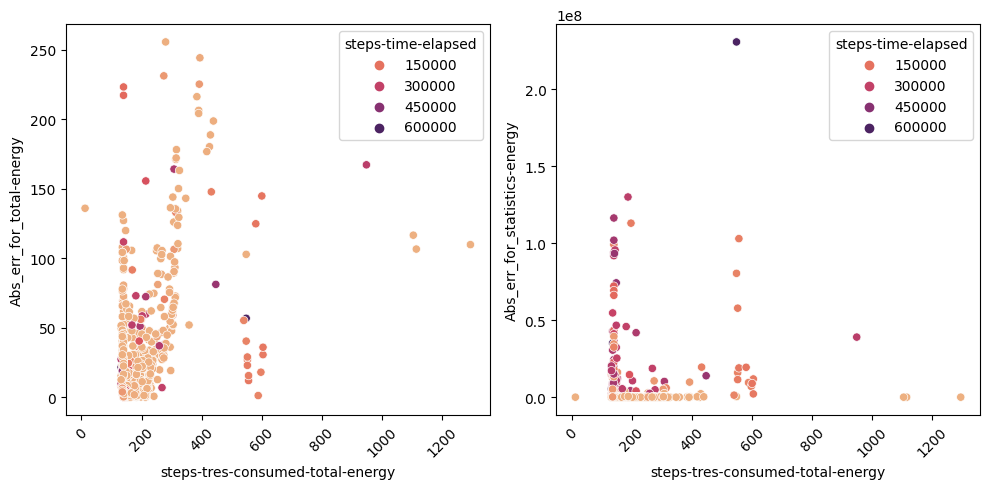

In [204]:
# Plot errors for both targets as y on the same plot dependent on steps-time-elapsed as x
_df = pd.concat([ab, y_test], axis=1).reset_index(drop=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
hue = 'steps-time-elapsed'
x = 'steps-tres-consumed-total-energy'
y = 'Abs_err_for_total-energy'
sns.scatterplot(x=x, y=y, data=_df, hue=hue, palette='flare', ax=ax[0])
y = 'Abs_err_for_statistics-energy'
sns.scatterplot(x=x, y=y, data=_df, hue=hue, palette='flare', ax=ax[1])

# Rotate xticks for better readability
plt.setp(ax[0].get_xticklabels(), rotation=45)
plt.setp(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
